In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [3]:
# Load the datasets
benin_df = pd.read_csv('../data/benin-malanville.csv')
sierraleone_df = pd.read_csv('../data/sierraleone-bumbuna.csv')
togo_df = pd.read_csv('../data/togo-dapaong_qc.csv')

In [11]:
# 1. Summary Statistics
def summary_statistics(df):
    print("Summary Statistics:")
    return df.describe()

summary_statistics(benin_df)
summary_statistics(sierraleone_df)
summary_statistics(togo_df)

Summary Statistics:
Summary Statistics:
Summary Statistics:


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [ ]:
# 2. Data Quality Check
def data_quality_check(df):
    print("Missing Values:\n", df.isnull().sum())
    print("\nNegative Values (if applicable):\n", df[(df[['GHI', 'DNI', 'DHI']] < 0).any(1)])
    print("\nOutliers using Z-score:\n", df[(np.abs(zscore(df.select_dtypes(include=[np.number]))) > 3).any(axis=1)])

data_quality_check(benin_df)

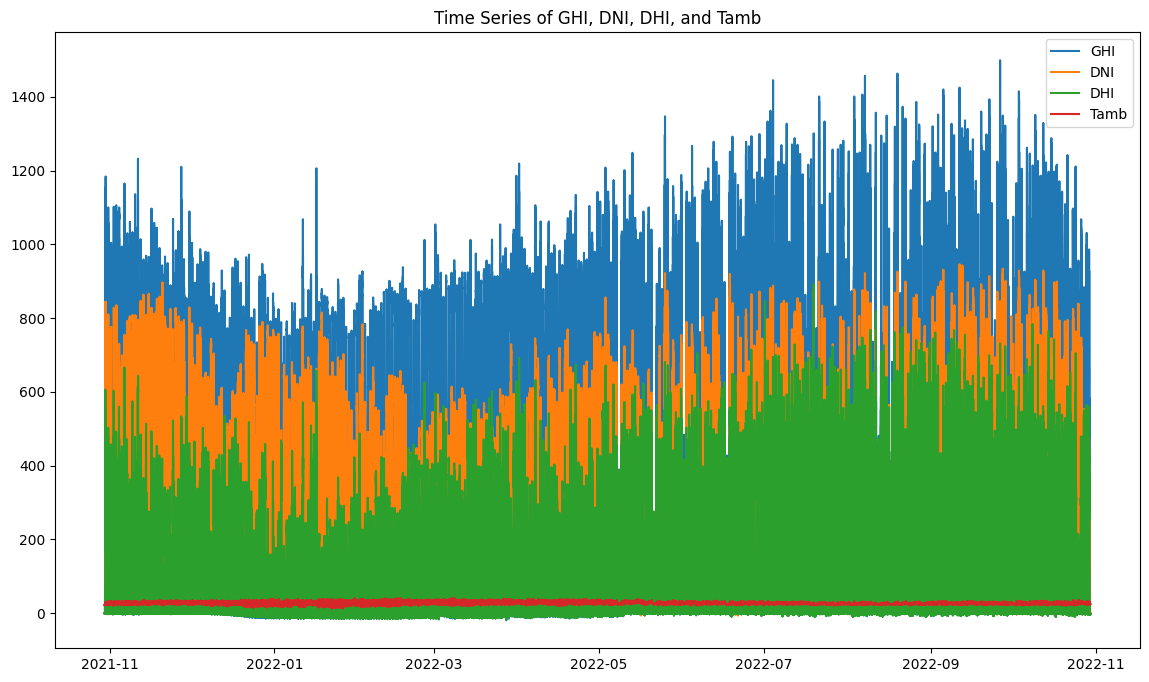

In [16]:
# 3. Time Series Analysis
def time_series_analysis(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df.set_index('Timestamp', inplace=True)
    
    plt.figure(figsize=(14, 8))
    plt.plot(df.index, df['GHI'], label='GHI')
    plt.plot(df.index, df['DNI'], label='DNI')
    plt.plot(df.index, df['DHI'], label='DHI')
    plt.plot(df.index, df['Tamb'], label='Tamb')
    plt.legend()
    plt.title("Time Series of GHI, DNI, DHI, and Tamb")
    plt.show()
time_series_analysis(sierraleone_df)    

In [4]:
# 4. Impact of Cleaning
def impact_of_cleaning(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Timestamp'], df['ModA'], label='ModA')
    plt.plot(df['Timestamp'], df['ModB'], label='ModB')
    plt.plot(df['Timestamp'], df['Cleaning'], label='Cleaning')
    plt.legend()
    plt.title("Impact of Cleaning on ModA and ModB")
    plt.show()

impact_of_cleaning(benin_df)

In [ ]:
# 5. Correlation Analysis
def correlation_analysis(df):
    corr = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap")
    plt.show()

correlation_analysis(sierraleone_df)

In [ ]:
# 6. Wind Analysis with Polar Plot
def wind_analysis(df):
    plt.figure(figsize=(8, 8))
    plt.polar(df['WD'] * np.pi / 180, df['WS'])
    plt.title("Wind Speed and Direction")
    plt.show()
wind_analysis(togo_df)

In [ ]:
# 7. Temperature and RH Analysis
def temperature_rh_analysis(df):
    sns.scatterplot(x=df['Tamb'], y=df['RH'])
    plt.title("Temperature vs. Relative Humidity")
    plt.show()
temperature_rh_analysis(benin_df)


In [ ]:
# 8. Histograms
def plot_histograms(df):
    df[['GHI', 'DNI', 'DHI', 'Tamb']].hist(bins=20, figsize=(14, 10))
    plt.show()

plot_histograms(sierraleone_df)

In [ ]:
# 9. Z-Score Analysis
def z_score_analysis(df):
    z_scores = np.abs(zscore(df.select_dtypes(include=[np.number])))
    print("Outliers detected by Z-score:\n", df[(z_scores > 3).any(axis=1)])

z_score_analysis(benin_df)

In [ ]:
# 10. Bubble Chart
def bubble_chart(df):
    plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
    plt.xlabel('GHI')
    plt.ylabel('Tamb')
    plt.title('Bubble Chart: GHI vs Tamb with RH as size')
    plt.show()
bubble_chart(sierraleone_df)

In [ ]:
# 11. Data Cleaning based on initial findings
def clean_data(df):
    df_cleaned = df.dropna(subset=['Comments'])
    df_cleaned = df_cleaned[df_cleaned['GHI'] >= 0]  
    return df_cleaned
clean_data(togo_df)